# Apartments for sale ads research

**Task:**

Based on the data of Yandex.Real estate devision— an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years - to determine th0e market value of real estate and set parameters that allow to build an automated system for tracking anomalies and fraudulent activity.

<h1>Table of contents:<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploration of data</a></span><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculations and adding results to the table</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory data analysis</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Final conclusion</a></span></li></div>

## 1. Exploration of data

There are two types of data available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, the airport, the nearest park and reservoir.

airports_nearest — distance to the nearest airport in meters (m)

balcony — number of balconies

ceiling_height — ceiling height (m)

cityCenters_nearest — distance to the city center (m)

days_exposition — how many days the ad was placed (from publication to withdrawal)

first_day_exposition — date of publication

floor — floor

floors_total — total floors in the house

is_apartment — apartments (boolean type)

kitchen_area — kitchen area in square meters (m2)

last_price — price at the time of withdrawal from publication

living_area — living area in square meters (m2)

locality_name — name of the locality

open_plan — free layout (boolean type)

parks_around3000 — number of parks within a 3 km radius

parks_nearest — distance to the nearest park (m)

ponds_around3000 — the number of reservoirs within a radius of 3 km

ponds_nearest — distance to the nearest reservoir (m)

rooms — number of rooms

studio — studio apartment (boolean type)

total_area — the area of the apartment in square meters (m2)

total_images — the number of photos of the apartment in the ad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings

warnings.simplefilter('ignore')


In [2]:
# Unloading the first rows of data and initial inspection
df = pd.read_csv('real_estate_data.csv',sep = '\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4902,8,1980000.0,51.0,2017-09-28T00:00:00,2,NaN,5.0,31.5,5,NaN,...,9.5,1.0,деревня Бегуницы,NaN,NaN,NaN,NaN,NaN,NaN,45.0
3465,20,4900000.0,54.6,2018-07-24T00:00:00,3,NaN,6.0,39.5,4,NaN,...,5.1,NaN,Санкт-Петербург,20114.0,5467.0,2.0,450.0,0.0,NaN,32.0
16821,20,5100000.0,47.8,2018-08-15T00:00:00,2,2.6,9.0,30.5,2,NaN,...,7.0,1.0,Санкт-Петербург,40808.0,13312.0,0.0,NaN,0.0,NaN,142.0
22492,10,5100000.0,56.0,2018-09-05T00:00:00,2,2.5,7.0,29.0,5,NaN,...,15.0,1.0,Санкт-Петербург,39812.0,9072.0,1.0,602.0,0.0,NaN,61.0
5273,10,4500000.0,53.0,2018-10-18T00:00:00,1,2.7,25.0,14.0,22,NaN,...,13.0,1.0,Санкт-Петербург,48847.0,16685.0,0.0,NaN,0.0,NaN,62.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Intermediate conclusion

1) first_date_exposition must be converted to datetime type;

2) there are a lot of gaps in the columns ceiling_height, living_area, kitchen_area, parks_nearest and ponds_nearest locality_name;

3) there are a lot of omissions in the is_apartment column and the object data type, it is logical to find out whether it refers to housing(features) apartment categories and convert to bool;

4) there are a lot of gaps in the balcony column, and you also need to convert to the int64 type;

5) airport_nearest a lot of passes, they probably mean there is no airport nearby;

6) city Center = needs to be renamed, lots of empty values;

7) days_exposition should be converted into int64


## 2. Data preprocessing

Let's rename the columns (bring them to the snake register and introduce refinements for the values)

In [7]:
df.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [8]:
# Rename the columns and enter the callouts
columns=['total_images',
        'last_price',
        'total_area_m2',
        'first_day_exposition',
        'total_rooms',
        'ceiling_height_m',
        'total_house_floors',
        'living_area_m2',
        'floor',
        'is_apartment',
        'is_studio',
        'is_open_plan',
        'kitchen_area_m2',
        'balconies_number',
        'locality_name',
        'nearest_airports_distance_m',
        'city_center_distance_m',
        'parks_number_around_3km',
        'nearest_park_distance_m',
        'ponds_number_around_3km',
        'nearest_pond_distance_m',
        'days_exposition']
df.set_axis(columns, axis='columns', inplace=True)

In [9]:
# Let's check the renaming
df.columns.tolist()

['total_images',
 'last_price',
 'total_area_m2',
 'first_day_exposition',
 'total_rooms',
 'ceiling_height_m',
 'total_house_floors',
 'living_area_m2',
 'floor',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'kitchen_area_m2',
 'balconies_number',
 'locality_name',
 'nearest_airports_distance_m',
 'city_center_distance_m',
 'parks_number_around_3km',
 'nearest_park_distance_m',
 'ponds_number_around_3km',
 'nearest_pond_distance_m',
 'days_exposition']

In [10]:
# Let's check the number of NaN values by columns and output their share
round((df.isna().sum().sort_values(ascending=False)/len(df)) * 100, 2)

is_apartment                   88.29
nearest_park_distance_m        65.91
nearest_pond_distance_m        61.56
balconies_number               48.61
ceiling_height_m               38.80
nearest_airports_distance_m    23.38
city_center_distance_m         23.29
ponds_number_around_3km        23.28
parks_number_around_3km        23.28
days_exposition                13.42
kitchen_area_m2                 9.61
living_area_m2                  8.03
total_house_floors              0.36
locality_name                   0.21
total_images                    0.00
last_price                      0.00
is_studio                       0.00
floor                           0.00
total_rooms                     0.00
first_day_exposition            0.00
total_area_m2                   0.00
is_open_plan                    0.00
dtype: float64

In [11]:
df.isna().mean()

total_images                   0.000000
last_price                     0.000000
total_area_m2                  0.000000
first_day_exposition           0.000000
total_rooms                    0.000000
ceiling_height_m               0.387991
total_house_floors             0.003629
living_area_m2                 0.080299
floor                          0.000000
is_apartment                   0.882906
is_studio                      0.000000
is_open_plan                   0.000000
kitchen_area_m2                0.096122
balconies_number               0.486054
locality_name                  0.002068
nearest_airports_distance_m    0.233850
city_center_distance_m         0.232879
parks_number_around_3km        0.232837
nearest_park_distance_m        0.659100
ponds_number_around_3km        0.232837
nearest_pond_distance_m        0.615596
days_exposition                0.134225
dtype: float64

A large proportion of missing values is in:

1) is_apartment - probably not in all lines where real estate does not belong to apartments, the False value is stated. It is necessary to change the data type to bool

2) balkonies_number - probably not filled False for a property without a balcony

3) nearest_airport_distance_m - probably the False lines are not filled in for places where there is no airport nearby

In [12]:
# Let's structure the table so that it describes the locality, the type of real estate, the specifics of the area of the premises, their location, the timing of the ad placement, the cost, the number of images, additional characteristics of the proximity of parks and reservoirs
df = df[['locality_name',
         'city_center_distance_m',
         'is_apartment',
         'is_studio',
         'is_open_plan',
         'total_rooms',
         'floor',
         'total_house_floors',
         'total_area_m2',
         'living_area_m2',
         'kitchen_area_m2',
         'balconies_number',
         'ceiling_height_m',
         'first_day_exposition',
         'days_exposition',
         'last_price',
         'total_images',
         'nearest_airports_distance_m',
         'parks_number_around_3km',
         'nearest_park_distance_m',
         'ponds_number_around_3km',
         'nearest_pond_distance_m',
        ]]

In [13]:
df.head()

,locality_name,city_center_distance_m,is_apartment,is_studio,is_open_plan,total_rooms,floor,total_house_floors,total_area_m2,living_area_m2,...,ceiling_height_m,first_day_exposition,days_exposition,last_price,total_images,nearest_airports_distance_m,parks_number_around_3km,nearest_park_distance_m,ponds_number_around_3km,nearest_pond_distance_m
0,Санкт-Петербург,16028.0,NaN,False,False,3,8,16.0,108.0,51.0,...,2.70,2019-03-07T00:00:00,NaN,13000000.0,20,18863.0,1.0,482.0,2.0,755.0
1,посёлок Шушары,18603.0,NaN,False,False,1,1,11.0,40.4,18.6,...,NaN,2018-12-04T00:00:00,81.0,3350000.0,7,12817.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,13933.0,NaN,False,False,2,4,5.0,56.0,34.3,...,NaN,2015-08-20T00:00:00,558.0,5196000.0,10,21741.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,6800.0,NaN,False,False,3,9,14.0,159.0,NaN,...,NaN,2015-07-24T00:00:00,424.0,64900000.0,0,28098.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,8098.0,NaN,False,False,2,13,14.0,100.0,32.0,...,3.03,2018-06-19T00:00:00,121.0,10000000.0,2,31856.0,2.0,112.0,1.0,48.0


Let's check each column

In [14]:
len(df['locality_name'].unique())

365

In [15]:
df['locality_name'].unique().tolist()

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

In [16]:
df['localuty_name'] = df['locality_name'].str.lower()

In [17]:
len(df['locality_name'].unique())

365

In [18]:
# In the unique values, repetitions are visible due to the different spelling of the village or settlement (e or Ё), we will bring it to a single format
df['locality_name'] = df['locality_name'].str.replace('ё','е', regex=True)

In [19]:
len(df['locality_name'].unique())

331

In [20]:
df['locality_name'].isna().sum()

49

In [21]:
# 49 lines are not filled in the locality_name column, since their percentage is insignificant, and it is not possible to reliably determine which locality is indicated, then it is proposed to delete these lines
df = df.dropna(subset=['locality_name'])

In [22]:
# Let's check the deletion of lines where the locality is not specified

df['locality_name'].isna().sum()

0

In [23]:
df['locality_name'].str.lower()

0            санкт-петербург
1             поселок шушары
2            санкт-петербург
3            санкт-петербург
4            санкт-петербург
                ...         
23694        санкт-петербург
23695                  тосно
23696       село рождествено
23697        санкт-петербург
23698    поселок новый учхоз
Name: locality_name, Length: 23650, dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   locality_name                23650 non-null  object 
 1   city_center_distance_m       18139 non-null  float64
 2   is_apartment                 2760 non-null   object 
 3   is_studio                    23650 non-null  bool   
 4   is_open_plan                 23650 non-null  bool   
 5   total_rooms                  23650 non-null  int64  
 6   floor                        23650 non-null  int64  
 7   total_house_floors           23565 non-null  float64
 8   total_area_m2                23650 non-null  float64
 9   living_area_m2               21752 non-null  float64
 10  kitchen_area_m2              21381 non-null  float64
 11  balconies_number             12137 non-null  float64
 12  ceiling_height_m             14490 non-null  float64
 13  first_day_exposi

Let's eliminate the missing values in is_apartment, is_studio, is_open_plan columns

In [25]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

Based on the logic of filling in the is_apartment column, it can be assumed that the property in the lines of which NaN is specified is not an apartment and, therefore, it is possible to fill these lines with False

In [26]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [27]:
df['is_apartment'].dtype

dtype('bool')

In [28]:
df['is_studio'].unique()

array([False,  True])

In [29]:
df['is_open_plan'].unique()

array([False,  True])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   locality_name                23650 non-null  object 
 1   city_center_distance_m       18139 non-null  float64
 2   is_apartment                 23650 non-null  bool   
 3   is_studio                    23650 non-null  bool   
 4   is_open_plan                 23650 non-null  bool   
 5   total_rooms                  23650 non-null  int64  
 6   floor                        23650 non-null  int64  
 7   total_house_floors           23565 non-null  float64
 8   total_area_m2                23650 non-null  float64
 9   living_area_m2               21752 non-null  float64
 10  kitchen_area_m2              21381 non-null  float64
 11  balconies_number             12137 non-null  float64
 12  ceiling_height_m             14490 non-null  float64
 13  first_day_exposi

Let's continue preprocessing the columns and start with the balkonies_number

In [31]:
df['balconies_number'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [32]:
# NaN is 48% of the total number of values in this column. Presumably, these are apartments without balconies, so we will fill them with 0
df['balconies_number'].isna().sum()

11513

In [33]:
df['balconies_number'] = df['balconies_number'].fillna(0.0)

In [34]:
df['balconies_number'] = df['balconies_number'].astype('int64')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   locality_name                23650 non-null  object 
 1   city_center_distance_m       18139 non-null  float64
 2   is_apartment                 23650 non-null  bool   
 3   is_studio                    23650 non-null  bool   
 4   is_open_plan                 23650 non-null  bool   
 5   total_rooms                  23650 non-null  int64  
 6   floor                        23650 non-null  int64  
 7   total_house_floors           23565 non-null  float64
 8   total_area_m2                23650 non-null  float64
 9   living_area_m2               21752 non-null  float64
 10  kitchen_area_m2              21381 non-null  float64
 11  balconies_number             23650 non-null  int64  
 12  ceiling_height_m             14490 non-null  float64
 13  first_day_exposi

In [36]:
df['balconies_number'].value_counts()

0    15238
1     4187
2     3658
5      304
4      182
3       81
Name: balconies_number, dtype: int64

In [37]:
df['balconies_number'].isna().sum()

0

**Intermediate conclusion**

-Identified duplicate data has been eliminated in the dataframe.

-The main parameters for which there are no missing values (and apparently the unloading was formed first of all): last_price, total_area, first_day_exposition.

--The data types in the columns do not always correspond to the logic of the columns and required conversion to other data types.

-There are omissions, presumably related to the unwillingness of users to fill in the specified fields.

-Technical errors of automatic filling should be noted.

## 3. Calculations and adding results to the table

Convert first_day_exposition to datetime type

In [38]:
df['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [39]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT')

In [40]:
df.head()

,locality_name,city_center_distance_m,is_apartment,is_studio,is_open_plan,total_rooms,floor,total_house_floors,total_area_m2,living_area_m2,...,first_day_exposition,days_exposition,last_price,total_images,nearest_airports_distance_m,parks_number_around_3km,nearest_park_distance_m,ponds_number_around_3km,nearest_pond_distance_m,localuty_name
0,Санкт-Петербург,16028.0,False,False,False,3,8,16.0,108.0,51.0,...,2019-03-07,NaN,13000000.0,20,18863.0,1.0,482.0,2.0,755.0,санкт-петербург
1,поселок Шушары,18603.0,False,False,False,1,1,11.0,40.4,18.6,...,2018-12-04,81.0,3350000.0,7,12817.0,0.0,NaN,0.0,NaN,посёлок шушары
2,Санкт-Петербург,13933.0,False,False,False,2,4,5.0,56.0,34.3,...,2015-08-20,558.0,5196000.0,10,21741.0,1.0,90.0,2.0,574.0,санкт-петербург
3,Санкт-Петербург,6800.0,False,False,False,3,9,14.0,159.0,NaN,...,2015-07-24,424.0,64900000.0,0,28098.0,2.0,84.0,3.0,234.0,санкт-петербург
4,Санкт-Петербург,8098.0,False,False,False,2,13,14.0,100.0,32.0,...,2018-06-19,121.0,10000000.0,2,31856.0,2.0,112.0,1.0,48.0,санкт-петербург


In [41]:
# In the analysis, it may be interesting to take into account the year, month and day separately. Let's output them to separate columns
df['weekday_exposition'] = df['first_day_exposition'].dt.day_name()
df['month_exposition'] = df['first_day_exposition'].dt.month_name()
df['year_exposition'] = df['first_day_exposition'].dt.year

In [42]:
df.head()

,locality_name,city_center_distance_m,is_apartment,is_studio,is_open_plan,total_rooms,floor,total_house_floors,total_area_m2,living_area_m2,...,total_images,nearest_airports_distance_m,parks_number_around_3km,nearest_park_distance_m,ponds_number_around_3km,nearest_pond_distance_m,localuty_name,weekday_exposition,month_exposition,year_exposition
0,Санкт-Петербург,16028.0,False,False,False,3,8,16.0,108.0,51.0,...,20,18863.0,1.0,482.0,2.0,755.0,санкт-петербург,Thursday,March,2019
1,поселок Шушары,18603.0,False,False,False,1,1,11.0,40.4,18.6,...,7,12817.0,0.0,NaN,0.0,NaN,посёлок шушары,Tuesday,December,2018
2,Санкт-Петербург,13933.0,False,False,False,2,4,5.0,56.0,34.3,...,10,21741.0,1.0,90.0,2.0,574.0,санкт-петербург,Thursday,August,2015
3,Санкт-Петербург,6800.0,False,False,False,3,9,14.0,159.0,NaN,...,0,28098.0,2.0,84.0,3.0,234.0,санкт-петербург,Friday,July,2015
4,Санкт-Петербург,8098.0,False,False,False,2,13,14.0,100.0,32.0,...,2,31856.0,2.0,112.0,1.0,48.0,санкт-петербург,Tuesday,June,2018


In [43]:
# Let's converte the values in the columns into km
df['city_center_distance_km'] = df['city_center_distance_m'] / 1000
df['nearest_airport_distance_km'] = df['nearest_airports_distance_m'] / 1000
df['nearest_park_distance_km'] = df['nearest_park_distance_m'] / 1000
df['nearest_pond_distance_km'] = df['nearest_pond_distance_m'] / 1000

In [44]:
df.head()

,locality_name,city_center_distance_m,is_apartment,is_studio,is_open_plan,total_rooms,floor,total_house_floors,total_area_m2,living_area_m2,...,ponds_number_around_3km,nearest_pond_distance_m,localuty_name,weekday_exposition,month_exposition,year_exposition,city_center_distance_km,nearest_airport_distance_km,nearest_park_distance_km,nearest_pond_distance_km
0,Санкт-Петербург,16028.0,False,False,False,3,8,16.0,108.0,51.0,...,2.0,755.0,санкт-петербург,Thursday,March,2019,16.028,18.863,0.482,0.755
1,поселок Шушары,18603.0,False,False,False,1,1,11.0,40.4,18.6,...,0.0,NaN,посёлок шушары,Tuesday,December,2018,18.603,12.817,NaN,NaN
2,Санкт-Петербург,13933.0,False,False,False,2,4,5.0,56.0,34.3,...,2.0,574.0,санкт-петербург,Thursday,August,2015,13.933,21.741,0.090,0.574
3,Санкт-Петербург,6800.0,False,False,False,3,9,14.0,159.0,NaN,...,3.0,234.0,санкт-петербург,Friday,July,2015,6.800,28.098,0.084,0.234
4,Санкт-Петербург,8098.0,False,False,False,2,13,14.0,100.0,32.0,...,1.0,48.0,санкт-петербург,Tuesday,June,2018,8.098,31.856,0.112,0.048


In [45]:
del df['city_center_distance_m']
del df['nearest_airports_distance_m']
del df['nearest_park_distance_m']
del df['nearest_pond_distance_m']

In [46]:
df.columns.tolist()

['locality_name',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'total_rooms',
 'floor',
 'total_house_floors',
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'balconies_number',
 'ceiling_height_m',
 'first_day_exposition',
 'days_exposition',
 'last_price',
 'total_images',
 'parks_number_around_3km',
 'ponds_number_around_3km',
 'localuty_name',
 'weekday_exposition',
 'month_exposition',
 'year_exposition',
 'city_center_distance_km',
 'nearest_airport_distance_km',
 'nearest_park_distance_km',
 'nearest_pond_distance_km']

In [47]:
df.describe()

,total_rooms,floor,total_house_floors,total_area_m2,living_area_m2,kitchen_area_m2,balconies_number,ceiling_height_m,days_exposition,last_price,total_images,parks_number_around_3km,ponds_number_around_3km,year_exposition,city_center_distance_km,nearest_airport_distance_km,nearest_park_distance_km,nearest_pond_distance_km
count,23650.000000,23650.000000,23565.000000,23650.000000,21752.000000,21381.000000,23650.000000,14490.000000,20470.000000,2.365000e+04,23650.000000,18140.000000,18140.000000,23650.000000,18139.000000,18116.000000,8064.000000,9085.000000
mean,2.070106,5.893277,10.675875,60.329069,34.448356,10.566403,0.591712,2.771287,180.753200,6.541127e+06,9.862326,0.611577,0.769680,2017.370021,14.197861,28.803226,0.490831,0.518060
std,1.078620,4.883317,6.594823,35.661808,22.037664,5.901753,0.959662,1.261593,219.777916,1.089640e+07,5.682278,0.802003,0.937948,1.037806,8.606830,12.637314,0.342554,0.277842
min,0.000000,1.000000,1.000000,12.000000,2.000000,1.300000,0.000000,1.000000,1.000000,1.219000e+04,0.000000,0.000000,0.000000,2014.000000,0.181000,0.000000,0.001000,0.013000
25%,1.000000,2.000000,5.000000,40.000000,18.600000,7.000000,0.000000,2.520000,45.000000,3.400000e+06,6.000000,0.000000,0.000000,2017.000000,9.241000,18.575750,0.288000,0.293000
50%,2.000000,4.000000,9.000000,52.000000,30.000000,9.100000,0.000000,2.650000,95.000000,4.650000e+06,9.000000,0.000000,1.000000,2017.000000,13.105000,26.756500,0.454500,0.502000
75%,3.000000,8.000000,16.000000,69.700000,42.300000,12.000000,1.000000,2.800000,231.000000,6.799000e+06,14.000000,1.000000,1.000000,2018.000000,16.293000,37.294000,0.612000,0.730000
max,19.000000,33.000000,60.000000,900.000000,409.700000,112.000000,5.000000,100.000000,1580.000000,7.630000e+08,50.000000,3.000000,3.000000,2019.000000,65.968000,84.869000,3.190000,1.344000


In [48]:
# let's add a column with the floor category
def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['total_house_floors']:
        return 'последний'
    else:
        return 'другой'
df['floor_status'] = df.apply(floor_status, axis=1)

In [49]:
# Let's introduce the columns of the price per square meter
df['price_per_meter'] = round(df['last_price'] / df['total_area_m2'], 2)

In [50]:
df.head()

,locality_name,is_apartment,is_studio,is_open_plan,total_rooms,floor,total_house_floors,total_area_m2,living_area_m2,kitchen_area_m2,...,localuty_name,weekday_exposition,month_exposition,year_exposition,city_center_distance_km,nearest_airport_distance_km,nearest_park_distance_km,nearest_pond_distance_km,floor_status,price_per_meter
0,Санкт-Петербург,False,False,False,3,8,16.0,108.0,51.0,25.0,...,санкт-петербург,Thursday,March,2019,16.028,18.863,0.482,0.755,другой,120370.37
1,поселок Шушары,False,False,False,1,1,11.0,40.4,18.6,11.0,...,посёлок шушары,Tuesday,December,2018,18.603,12.817,NaN,NaN,первый,82920.79
2,Санкт-Петербург,False,False,False,2,4,5.0,56.0,34.3,8.3,...,санкт-петербург,Thursday,August,2015,13.933,21.741,0.090,0.574,другой,92785.71
3,Санкт-Петербург,False,False,False,3,9,14.0,159.0,NaN,NaN,...,санкт-петербург,Friday,July,2015,6.800,28.098,0.084,0.234,другой,408176.10
4,Санкт-Петербург,False,False,False,2,13,14.0,100.0,32.0,41.0,...,санкт-петербург,Tuesday,June,2018,8.098,31.856,0.112,0.048,другой,100000.00


In [51]:
df['living_area_ratio'] = round(df['living_area_m2'] / df['total_area_m2'], 2)
df['kitchen_area_ratio'] = round(df['kitchen_area_m2'] / df['total_area_m2'], 2)


In [52]:
df.head()

,locality_name,is_apartment,is_studio,is_open_plan,total_rooms,floor,total_house_floors,total_area_m2,living_area_m2,kitchen_area_m2,...,month_exposition,year_exposition,city_center_distance_km,nearest_airport_distance_km,nearest_park_distance_km,nearest_pond_distance_km,floor_status,price_per_meter,living_area_ratio,kitchen_area_ratio
0,Санкт-Петербург,False,False,False,3,8,16.0,108.0,51.0,25.0,...,March,2019,16.028,18.863,0.482,0.755,другой,120370.37,0.47,0.23
1,поселок Шушары,False,False,False,1,1,11.0,40.4,18.6,11.0,...,December,2018,18.603,12.817,NaN,NaN,первый,82920.79,0.46,0.27
2,Санкт-Петербург,False,False,False,2,4,5.0,56.0,34.3,8.3,...,August,2015,13.933,21.741,0.090,0.574,другой,92785.71,0.61,0.15
3,Санкт-Петербург,False,False,False,3,9,14.0,159.0,NaN,NaN,...,July,2015,6.800,28.098,0.084,0.234,другой,408176.10,NaN,NaN
4,Санкт-Петербург,False,False,False,2,13,14.0,100.0,32.0,41.0,...,June,2018,8.098,31.856,0.112,0.048,другой,100000.00,0.32,0.41


In [53]:
df[['living_area_ratio', 'kitchen_area_ratio']].isna().sum()

living_area_ratio     1898
kitchen_area_ratio    2269
dtype: int64

**Intermediate conclusion:**
    
Data has been added to the dataframe, according to the task:

1) price per square meter;

2) day of the week, month and year of publication of the announcement;

3) grouping by apartment floors has been made;

4) the ratio of residential and total area;

5) also the ratio of the kitchen area to the total.

## 4. Exploratory data analysis

In [54]:
df[['total_area_m2', 'living_area_m2', 'kitchen_area_m2']].describe()

,total_area_m2,living_area_m2,kitchen_area_m2
count,23650.000000,21752.000000,21381.000000
mean,60.329069,34.448356,10.566403
std,35.661808,22.037664,5.901753
min,12.000000,2.000000,1.300000
25%,40.000000,18.600000,7.000000
50%,52.000000,30.000000,9.100000
75%,69.700000,42.300000,12.000000
max,900.000000,409.700000,112.000000


In [55]:
df[['last_price', 'price_per_meter']].describe()

,last_price,price_per_meter
count,2.365000e+04,2.365000e+04
mean,6.541127e+06,9.943225e+04
std,1.089640e+07,5.033794e+04
min,1.219000e+04,1.118300e+02
25%,3.400000e+06,7.661496e+04
50%,4.650000e+06,9.500000e+04
75%,6.799000e+06,1.142742e+05
max,7.630000e+08,1.907500e+06


In [56]:
df['total_rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: total_rooms, dtype: float64

In [57]:
df['ceiling_height_m'].describe()

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height_m, dtype: float64

After reviewing the data , you can note:

1) there are strong deviations in the maximum area

2) there are no significant deviations in the distribution of prices/prices per square meter

3) on average, there are 2 rooms in this property, although there is a clearly deviant housing with 19 rooms

4) in the ceiling height, the minimum height of 1 meter attracts attention, the median and average values differ by 12 cm.

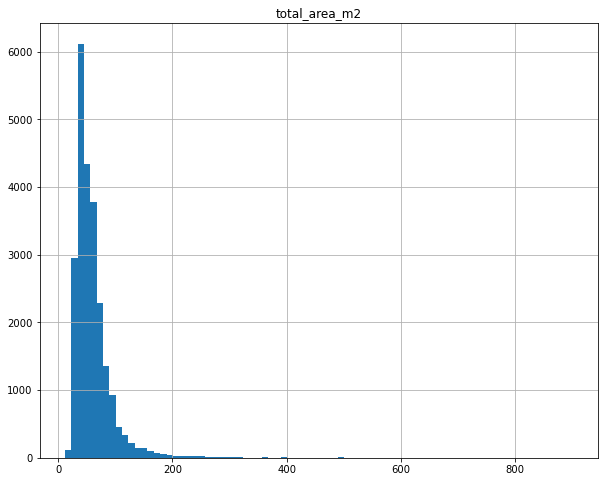

In [58]:
df['total_area_m2'].hist(bins=80, figsize=(10,8))
plt.title('total_area_m2')
plt.show()

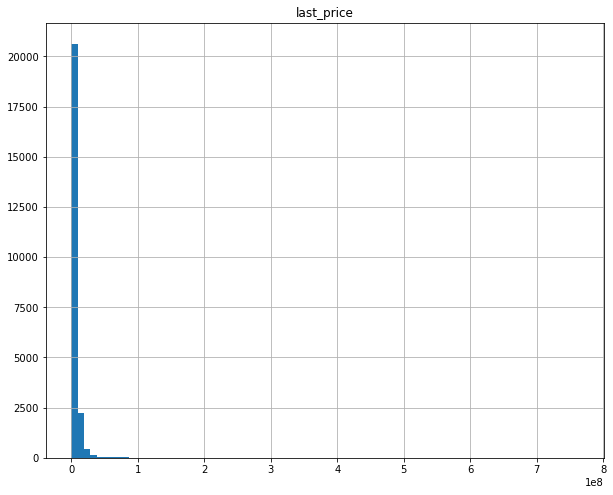

In [59]:
df['last_price'].hist(bins=80, figsize=(10,8))
plt.title('last_price')
plt.show()

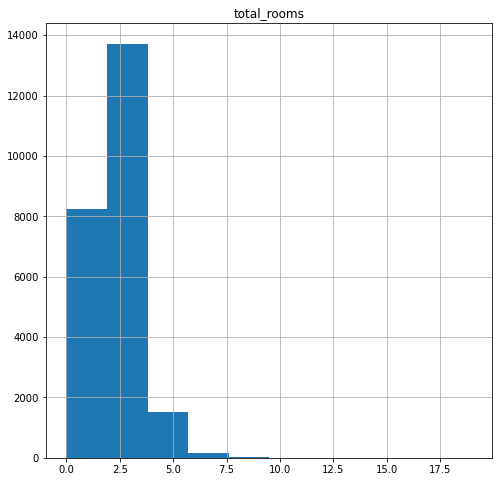

In [60]:
df['total_rooms'].hist(bins=10, figsize=(8,8))
plt.title('total_rooms')
plt.show()

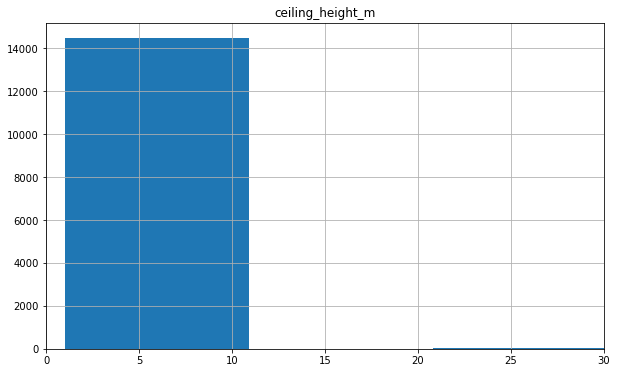

In [61]:
df['ceiling_height_m'].hist(bins=10, figsize=(10,6)).set_xlim(0,30)
plt.title('ceiling_height_m')
plt.show()

In [62]:
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

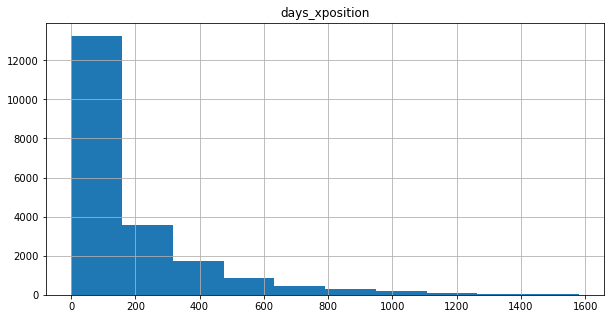

In [63]:
df['days_exposition'].hist(bins=10, figsize=(10,5))
plt.title('days_xposition')
plt.show()

In [64]:
# Removal of outliers and allocation of the zone of average values

def delete_outliers(df,column,graphic=0, x=10,y=10):
    quantile1 = df[column].quantile(0.25)
    quantile3 = df[column].quantile(0.75)
    iqr = quantile3 - quantile1
    column_range = (df[column] >= (quantile1 - 1.5*iqr)) & (df[column] <= (quantile3 + 1.5*iqr))
    if graphic == 1:
        return df.loc[column_range].boxplot([column], figsize=(x,y))
    else:
        return df.loc[column_range]

(0.0, 150.0)

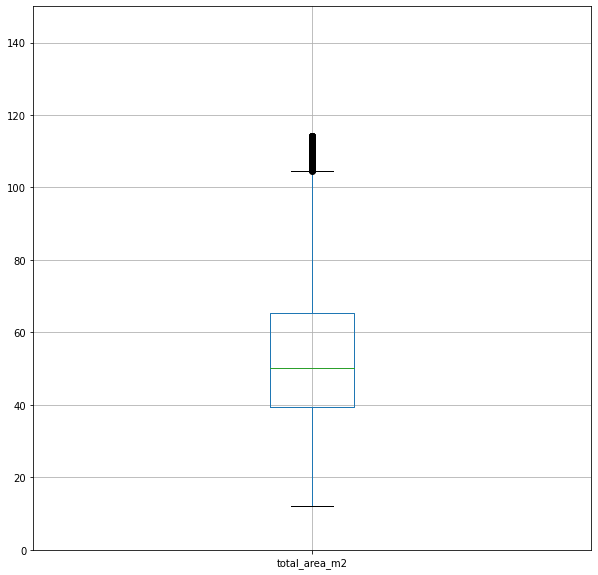

In [65]:
delete_outliers(df,'total_area_m2', 1, 10,10).set_ylim(0,150)

In [66]:
delete_outliers(df,'total_area_m2',0)['total_area_m2'].mean()

54.325685084352266

In [67]:
delete_outliers(df,'total_area_m2',0)['total_area_m2'].median()

50.1

(0.0, 10000000.0)

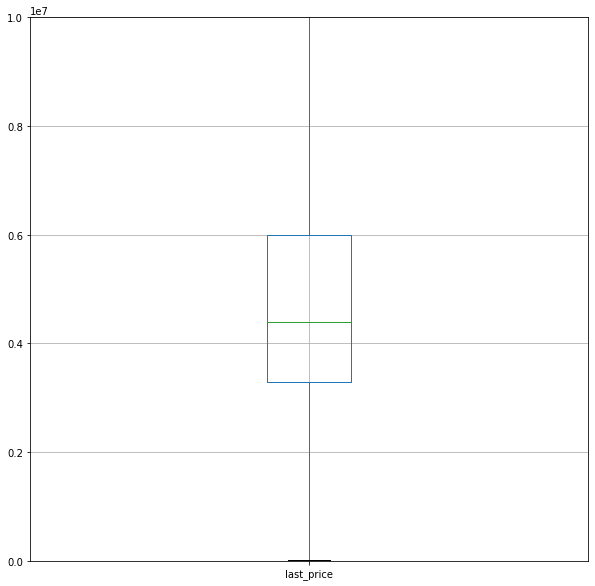

In [68]:
delete_outliers(df,'last_price',1,10,10).set_ylim(0,10000000)

In [69]:
delete_outliers(df,'last_price',0)['last_price'].mean()

4838942.090946979

In [70]:
delete_outliers(df,'last_price',0)['last_price'].median()

4400000.0

(0.0, 500.0)

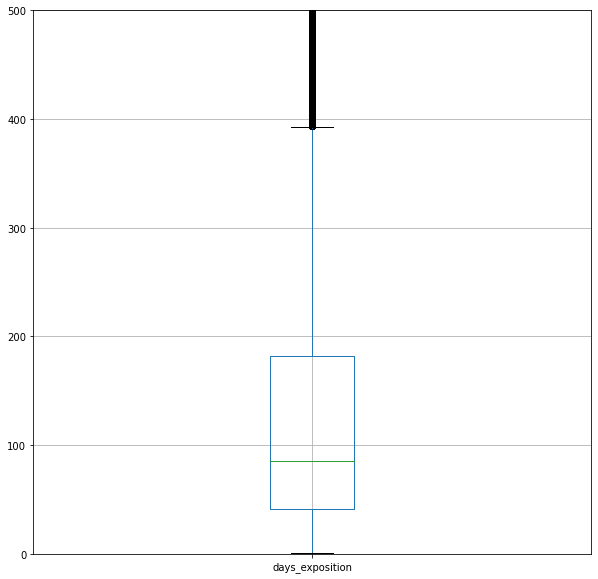

In [71]:
delete_outliers(df,'days_exposition',1,10,10).set_ylim(0,500)

In [72]:
delete_outliers(df,'days_exposition',0)['days_exposition'].mean()

128.39811662055757

(0.0, 200000.0)

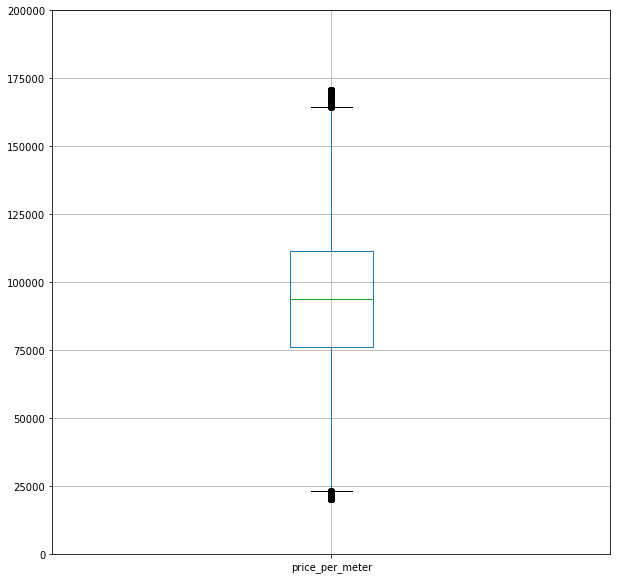

In [73]:
delete_outliers(df,'price_per_meter',1,10,10).set_ylim(0, 200000)

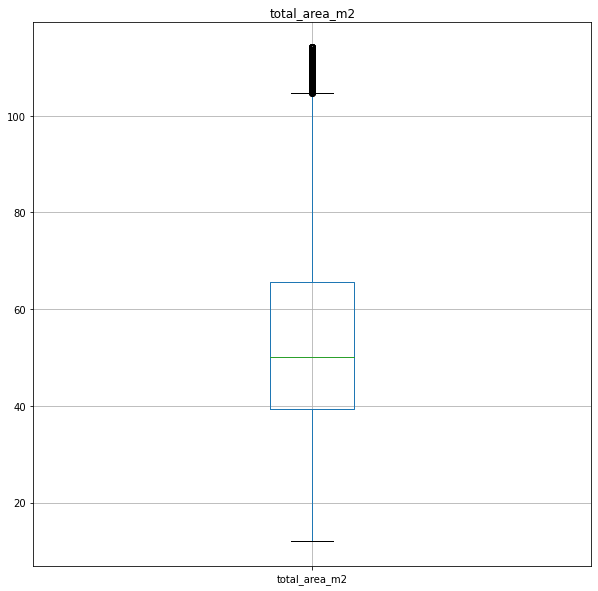


Среднее значения столбца total_area_m2 - 54.33 

Медианное значение столбца total_area_m2 - 50.1


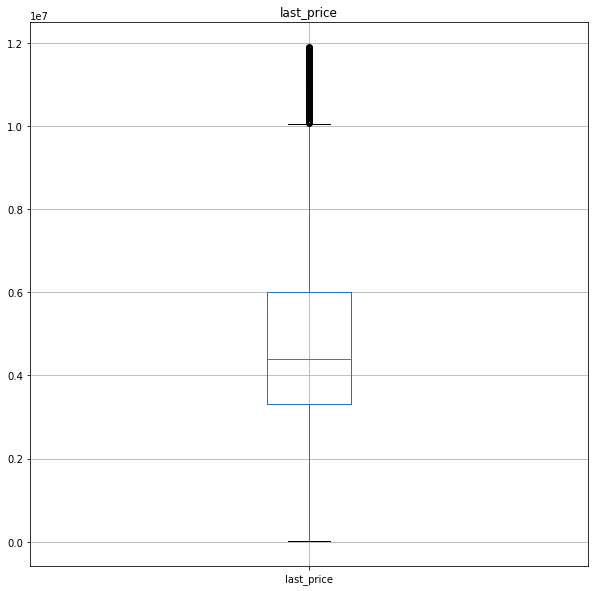


Среднее значения столбца last_price - 4838942.09 

Медианное значение столбца last_price - 4400000.0


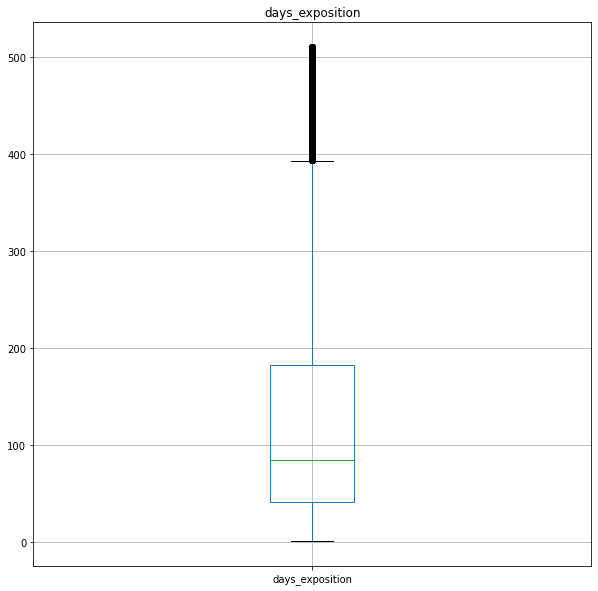


Среднее значения столбца days_exposition - 128.4 

Медианное значение столбца days_exposition - 85.0


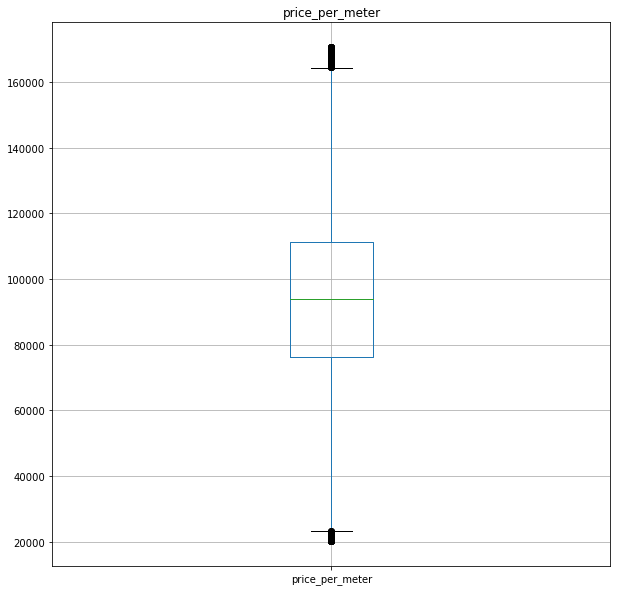


Среднее значения столбца price_per_meter - 93773.46 

Медианное значение столбца price_per_meter - 93913.04


In [74]:
draw_columns = ['total_area_m2','last_price','days_exposition','price_per_meter']

for i in draw_columns:
    delete_outliers(df,i,1,10,10)
    plt.title(i)
    plt.show()
    print()
    print(f'Среднее значения столбца {i} - {round(delete_outliers(df,i,0)[i].mean(),2)} ')
    print()
    print(f'Медианное значение столбца {i} - {delete_outliers(df,i,0)[i].median()}')

In [75]:
delete_outliers(df,'price_per_meter',0)['price_per_meter'].mean()

93773.45889844334

In [76]:
delete_outliers(df,'price_per_meter',0)['price_per_meter'].median()

93913.04

In [77]:
df.head()

,locality_name,is_apartment,is_studio,is_open_plan,total_rooms,floor,total_house_floors,total_area_m2,living_area_m2,kitchen_area_m2,...,month_exposition,year_exposition,city_center_distance_km,nearest_airport_distance_km,nearest_park_distance_km,nearest_pond_distance_km,floor_status,price_per_meter,living_area_ratio,kitchen_area_ratio
0,Санкт-Петербург,False,False,False,3,8,16.0,108.0,51.0,25.0,...,March,2019,16.028,18.863,0.482,0.755,другой,120370.37,0.47,0.23
1,поселок Шушары,False,False,False,1,1,11.0,40.4,18.6,11.0,...,December,2018,18.603,12.817,NaN,NaN,первый,82920.79,0.46,0.27
2,Санкт-Петербург,False,False,False,2,4,5.0,56.0,34.3,8.3,...,August,2015,13.933,21.741,0.090,0.574,другой,92785.71,0.61,0.15
3,Санкт-Петербург,False,False,False,3,9,14.0,159.0,NaN,NaN,...,July,2015,6.800,28.098,0.084,0.234,другой,408176.10,NaN,NaN
4,Санкт-Петербург,False,False,False,2,13,14.0,100.0,32.0,41.0,...,June,2018,8.098,31.856,0.112,0.048,другой,100000.00,0.32,0.41


In [78]:
corr = round(df[['total_area_m2',\
           'days_exposition',\
           'price_per_meter', \
           'city_center_distance_km', \
           'total_rooms']].corr(),2)
corr.style.background_gradient(cmap='cool')

,total_area_m2,days_exposition,price_per_meter,city_center_distance_km,total_rooms
total_area_m2,1.000000,0.150000,0.300000,-0.230000,0.760000
days_exposition,0.150000,1.000000,0.050000,-0.060000,0.130000
price_per_meter,0.300000,0.050000,1.000000,-0.320000,0.060000
city_center_distance_km,-0.230000,-0.060000,-0.320000,1.000000,-0.180000
total_rooms,0.760000,0.130000,0.060000,-0.180000,1.000000


The cost per square meter of real estate correlates most strongly with the total area, although the correlation coefficient is quite low. It should also be noted that there is a negative correlation between the cost per square meter and the distance to the city center, this is logical (the closer to the center, the more expensive the square meter).

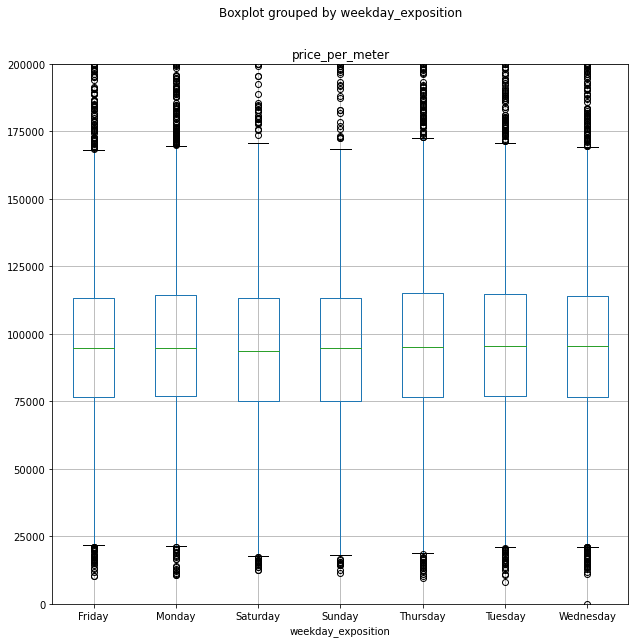

In [79]:
plot=df.boxplot('price_per_meter', by='weekday_exposition', figsize=(10,10)).set_ylim(0,200000)

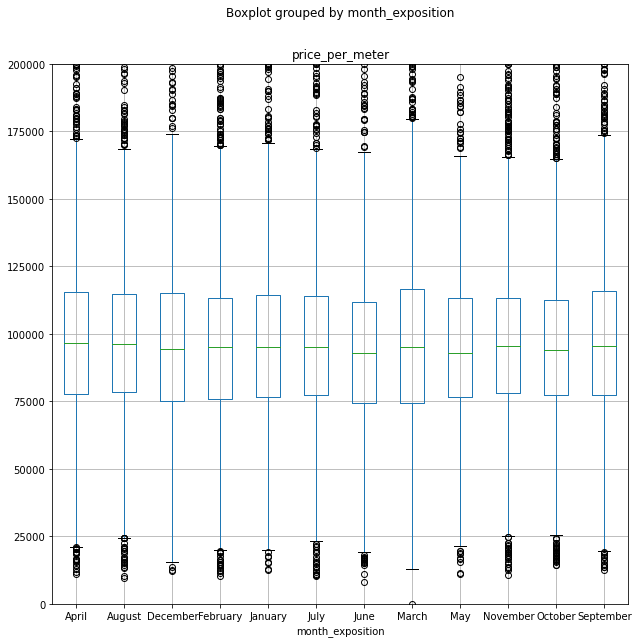

In [80]:
plot=df.boxplot('price_per_meter', by='month_exposition', figsize=(10,10)).set_ylim(0,200000)

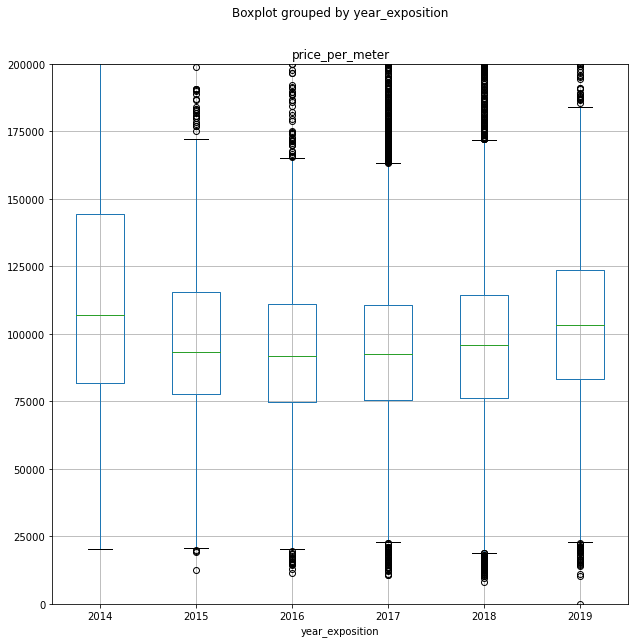

In [81]:
plot=df.boxplot('price_per_meter', by='year_exposition', figsize=(10,10)).set_ylim(0,200000)

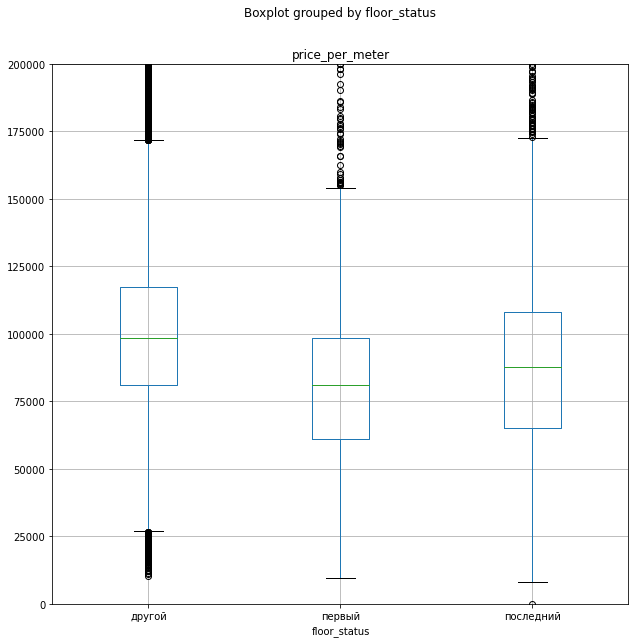

In [82]:
plot=df.boxplot('price_per_meter', by='floor_status', figsize=(10,10)).set_ylim(0,200000)

(0.0, 200000.0)

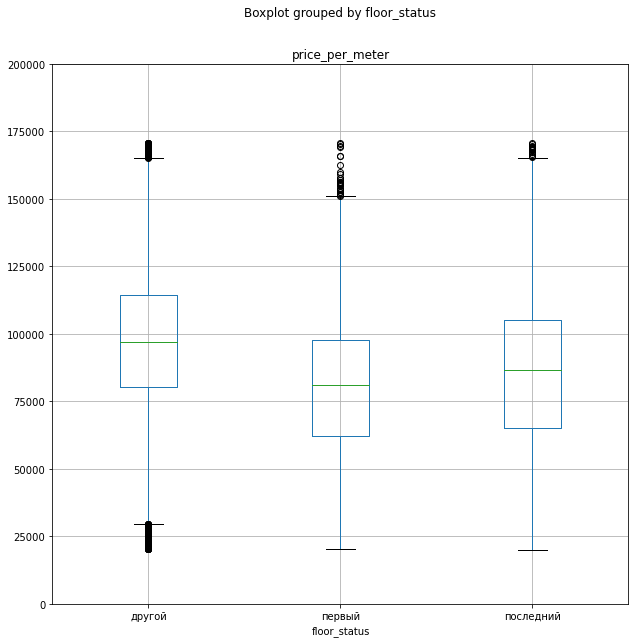

In [83]:
delete_outliers(df,'price_per_meter',0).boxplot('price_per_meter', by='floor_status',figsize=(10,10)).set_ylim(0,200000)

Let's define 10 localities with the largest number of ads. All localities other than St. Petersburg will be considered a suburb

In [84]:
(df['locality_name'].value_counts() / len(df) * 100).head(10)

Санкт-Петербург      66.473573
поселок Мурино        2.350951
поселок Шушары        1.860465
Всеволожск            1.682875
Пушкин                1.560254
Колпино               1.429175
поселок Парголово     1.382664
Гатчина               1.298097
деревня Кудрово       1.264271
Выборг                1.002114
Name: locality_name, dtype: float64

In [85]:
round(df.groupby('locality_name').agg({'price_per_meter':'mean'}),2).sort_values(by='price_per_meter', ascending=False).head(10)

,price_per_meter
locality_name,
Зеленогорск,115122.80
Санкт-Петербург,114849.01
поселок Репино,104238.61
Пушкин,103125.82
Сестрорецк,101757.62
поселок Лисий Нос,100660.82
Кудрово,100253.04
деревня Мистолово,98549.98
поселок Левашово,96997.69


We will introduce an additional column, which will reflect whether the locality belongs to St. Petersburg or not.

In [86]:
def is_spb(row):
    if row['locality_name'] == 'Санкт-Петербург':
        return True
    else:
        return False
    
df['is_spb'] = df.apply(is_spb,axis=1)
    

In [87]:
display(round(df.groupby('is_spb').agg({'price_per_meter':'mean'}),2).sort_values(by='price_per_meter'))

,price_per_meter
is_spb,
False,68865.10
True,114849.01


In [88]:
display(round(df.groupby('is_spb').agg({'price_per_meter':'median'}),2).sort_values(by='price_per_meter'))

,price_per_meter
is_spb,
False,68728.52
True,104761.90


(0.0, 200000.0)

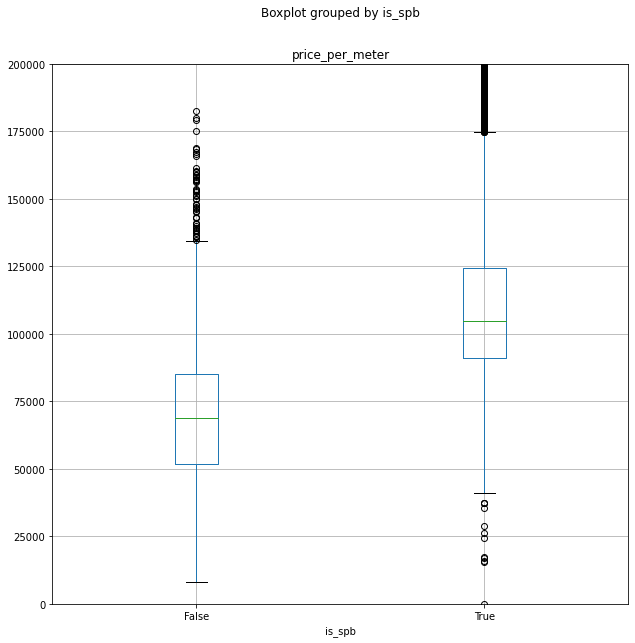

In [89]:
plot = df.boxplot('price_per_meter', by='is_spb', figsize=(10,10))
plot.set_ylim(0,200000)

In [90]:
top_10_df = df.groupby('locality_name').agg({'is_spb':'count','price_per_meter':'mean'})
top_10_df = top_10_df.sort_values('is_spb', ascending=False).head(10)

In [91]:
top_10_df.sort_values('price_per_meter', ascending=False).head(10)

,is_spb,price_per_meter
locality_name,,
Санкт-Петербург,15721,114849.008793
Пушкин,369,103125.819377
деревня Кудрово,299,92473.547559
поселок Парголово,327,90175.913089
поселок Мурино,556,85681.762572
поселок Шушары,440,78677.364318
Колпино,338,75424.579112
Гатчина,307,68746.146515
Всеволожск,398,68654.473970


<AxesSubplot:ylabel='locality_name'>

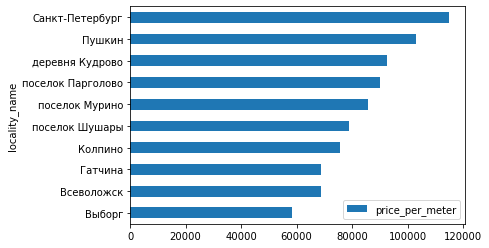

In [92]:
top_10_df.sort_values('price_per_meter', ascending=True)\
    .drop('is_spb', axis=1).plot(kind='barh')

In [93]:
top_10_list = top_10_df.reset_index().locality_name.to_list()

In [94]:
top_10_list

['Санкт-Петербург',
 'поселок Мурино',
 'поселок Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'поселок Парголово',
 'Гатчина',
 'деревня Кудрово',
 'Выборг']

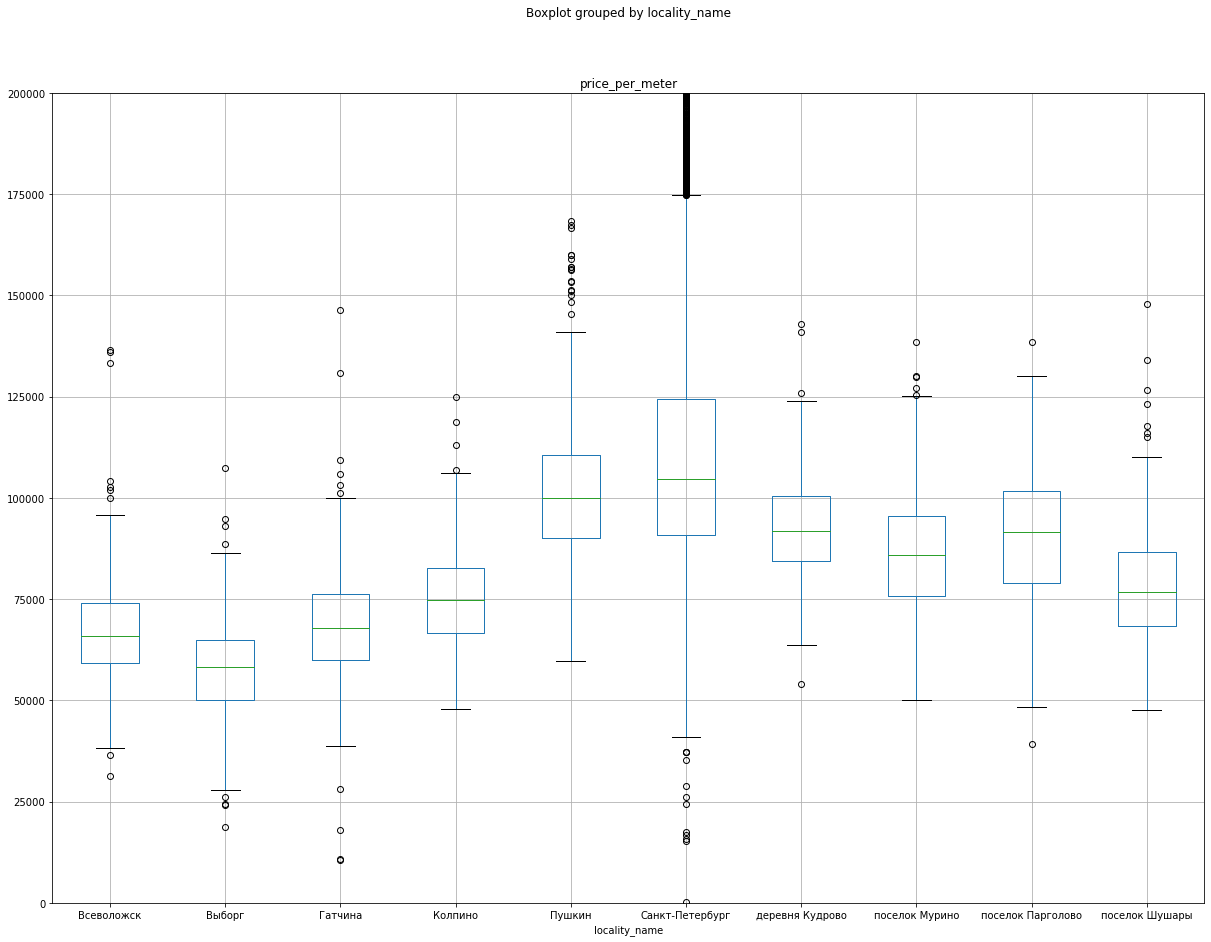

In [95]:
plot = df[df.locality_name.isin(top_10_list)]\
    .boxplot('price_per_meter', by='locality_name',figsize=(20,15))\
    .set_ylim(0,200000)

The cost of housing outside of St. Petersburg is lower than in the city.

Let's highlight the categories of apartments in the center (taking into account the area, number of rooms, distance from the center and cost)

In [96]:
round(df['city_center_distance_km'].isna().sum() / len(df) * 100, 2)

23.3

23.3 percent of the rows in the city_center_distance_km column are empty. It is not possible to fill in any values. We will allocate these values to a separate dataframe for further analysis

In [97]:
city_center_df = df.dropna(subset=['city_center_distance_km'])

In [98]:
city_center_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18139 entries, 0 to 23697
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   locality_name                18139 non-null  object        
 1   is_apartment                 18139 non-null  bool          
 2   is_studio                    18139 non-null  bool          
 3   is_open_plan                 18139 non-null  bool          
 4   total_rooms                  18139 non-null  int64         
 5   floor                        18139 non-null  int64         
 6   total_house_floors           18064 non-null  float64       
 7   total_area_m2                18139 non-null  float64       
 8   living_area_m2               16863 non-null  float64       
 9   kitchen_area_m2              16583 non-null  float64       
 10  balconies_number             18139 non-null  int64         
 11  ceiling_height_m             11548 non-nu

In [99]:
round(city_center_df['city_center_distance_km'].describe(),2)

count    18139.00
mean        14.20
std          8.61
min          0.18
25%          9.24
50%         13.10
75%         16.29
max         65.97
Name: city_center_distance_km, dtype: float64

A convenient way of grouping is to select by quantiles. So, 25% of the values in this column are within 9 km. Based on this, we estimate the correlation of this group by the main factors and price

In [100]:
city_center_9km = city_center_df.query('city_center_distance_km < 9')
city_center_out_9km = city_center_df.query('city_center_distance_km > 9')

cor_in_center = city_center_9km.corr()\
        .sort_values('last_price', ascending=False)\
        .filter(items = ['last_price'])\
        .reset_index()

cor_out_center = city_center_out_9km.corr()\
        .sort_values('last_price', ascending=False)\
        .filter(items = ['last_price'])\
        .reset_index()

# Let's put tables together
cor_in_out_center = cor_in_center.merge(cor_out_center, on='index')
cor_in_out_center = cor_in_out_center.rename(columns={'last_price_x':'cor_in_center', 'last_price_y':'cor_out_center'})
cor_in_out_center.style.background_gradient('cool')

,index,cor_in_center,cor_out_center
0,last_price,1.000000,1.000000
1,price_per_meter,0.776956,0.518153
2,total_area_m2,0.641044,0.819791
3,living_area_m2,0.545322,0.698790
4,kitchen_area_m2,0.506961,0.639293
5,total_rooms,0.345090,0.518997
6,total_images,0.131064,0.193682
7,ponds_number_around_3km,0.116041,0.087712
8,parks_number_around_3km,0.111203,0.091329
9,floor,0.106710,0.116915


For the sale of real estate in the center, first of all, important:

- Price per square meter
- All types of squares
- Number of rooms
- proximity of parks and reservoirs
- floor


Meanwhile, on the periphery:

- Squares
- Number of rooms
- Price per square meter
- Balconies
- Floor

We will select the most characteristic parameters for apartments, studios and open-plan apartments and determine whether they affect the price.

In [101]:
df['is_apartment'].value_counts()

False    23600
True        50
Name: is_apartment, dtype: int64

In [102]:
df['is_studio'].value_counts()

False    23501
True       149
Name: is_studio, dtype: int64

In [103]:
df['is_open_plan'].value_counts()

False    23583
True        67
Name: is_open_plan, dtype: int64

In [104]:
# It looks a little strange, since you will have to compare sets with a maximum number of 149 rows against 23 thousand.
apartment_df = df.query('is_apartment == 1')
studio_df = df.query('is_studio == 1')
open_plan_df = df.query('is_open_plan == 1')
ordinary_df = df.query('is_apartment == 0 & is_studio == 0 & is_open_plan == 0')

In [105]:
apartment_cor = apartment_df.corr()\
        .filter(items = ['last_price'])\
        .sort_values('last_price', ascending=False)\
        .reset_index()\
        .rename(columns={'last_price':'apartment_cor'})

In [106]:
studio_cor = studio_df.corr()\
        .filter(items = ['last_price'])\
        .sort_values('last_price', ascending=False)\
        .reset_index()\
        .rename(columns={'last_price':'studio_cor'})

In [107]:
open_plan_cor = open_plan_df.corr()\
        .filter(items = ['last_price'])\
        .sort_values('last_price', ascending=False)\
        .reset_index()\
        .rename(columns={'last_price':'open_plan_cor'})

In [108]:
ordinary_cor = ordinary_df.corr()\
        .filter(items = ['last_price'])\
        .sort_values('last_price', ascending=False)\
        .reset_index()\
        .rename(columns={'last_price':'ordinary_cor'})

In [109]:
final_corr = apartment_cor.merge(studio_cor)
final_corr = final_corr.merge(open_plan_cor)
final_corr = final_corr.merge(ordinary_cor)
final_corr

,index,apartment_cor,studio_cor,open_plan_cor,ordinary_cor
0,last_price,1.000000,1.000000,1.000000,1.000000
1,living_area_m2,0.832499,0.741941,0.828737,0.564243
2,total_area_m2,0.810846,0.853328,0.959663,0.651997
3,kitchen_area_m2,0.698444,NaN,NaN,0.518186
4,days_exposition,0.672321,0.128850,0.023479,0.077304
5,price_per_meter,0.565047,0.595685,0.661934,0.739624
6,parks_number_around_3km,0.454835,0.004447,0.304029,0.148205
7,total_rooms,0.399182,-0.050364,0.388753,0.364555
8,ponds_number_around_3km,0.286780,0.006379,0.189604,0.159594
9,is_spb,0.181487,0.443556,0.232037,0.196261


Let's analyze the general offer of real estate and highlight the boundaries of the center of St. Petersburg (we follow the traditional logic: the closer to the center, the more expensive the property)

In [110]:
#Let's create a separate dataframe with data on St. Petersburg with data on the price and distance to the center
spb_city_center = df[['locality_name','last_price','city_center_distance_km']]

In [111]:
# Let's delete entries with missing values in the name of the locality, as well as where the locality is not St. Petersburg
spb_city_center = spb_city_center.dropna(subset=['city_center_distance_km'])
spb_city_center.drop(spb_city_center.query('locality_name != "Санкт-Петербург"').index, inplace=True)

In [112]:
# Let's summarize the average price for each kilometer into the table
spb_price_km = pd.pivot_table(
    spb_city_center, values='last_price', index='city_center_distance_km', aggfunc={'mean'}).reset_index()
spb_price_km.head()

,city_center_distance_km,mean
0,0.181,31099000.0
1,0.208,5800000.0
2,0.215,10990000.0
3,0.287,9590000.0
4,0.291,11500000.0


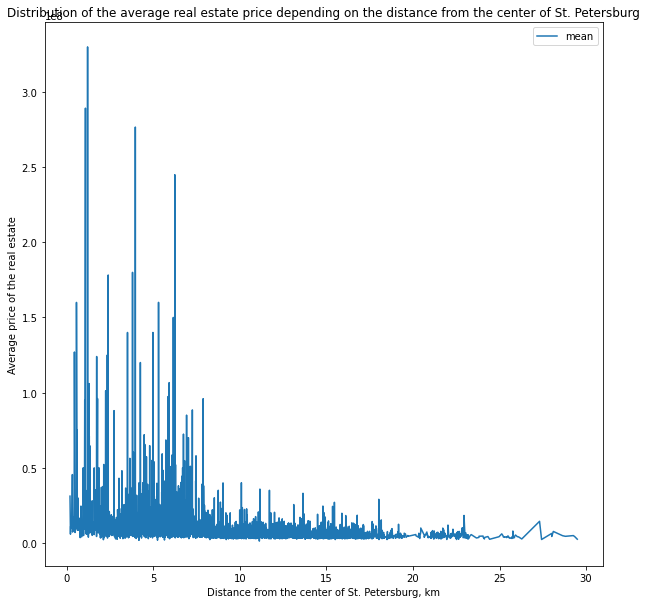

In [113]:
spb_price_km.plot(x='city_center_distance_km', y='mean', figsize=(10,10))
plt.title('Distribution of the average real estate price depending on the distance from the center of St. Petersburg')
plt.xlabel('Distance from the center of St. Petersburg, km')
plt.ylabel('Average price of the real estate')
plt.show()

The graph shows that a sharp decline in the cost occurs at 8 km from the center. Based on this, we will consider the property located within 8 km to be located in the center of St. Petersburg

In [114]:
# borders of the central zone of St. Petersburg
spb_center_border = 8

In [115]:
# selection of apartments in the center of St. Petersburg
spb_center = df[
    (df['locality_name'] == "Санкт-Петербург") & \
    (df['city_center_distance_km'] <= spb_center_border)
]
spb_center.head()

# selection of apartments outside the center of St. Petersburg
spb_suburban = df[
    (df['locality_name'] == "Санкт-Петербург") & \
    (df['city_center_distance_km'] > spb_center_border)
]

# selection of all apartments in St. Petersburg
spb_all = df.query('locality_name == "Санкт-Петербург"')

# the percentage of apartments in the center that are not included in the sample
print('Offers in the center of St. Petersburg are {:.0%} of all real estate listings in the city.'.format(len(spb_center)/len(spb_all)))

Offers in the center of St. Petersburg are 24% of all real estate listings in the city.


In [116]:
# parameters to study and check
parameters_spb_general_check = [
    ['total_area_m2', 'Real estate total area'],
    ['last_price', 'Price'],
    ['total_rooms', 'Number of rooms'],
    ['ceiling_height_m', 'Ceiling height']
]

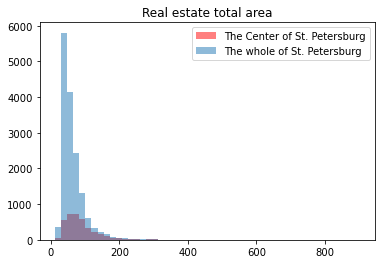

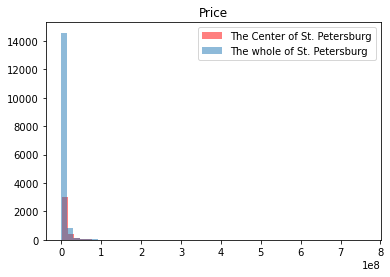

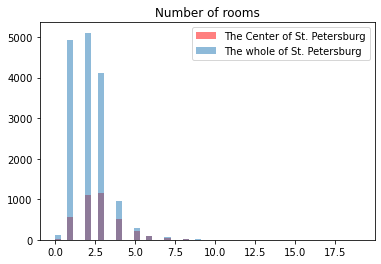

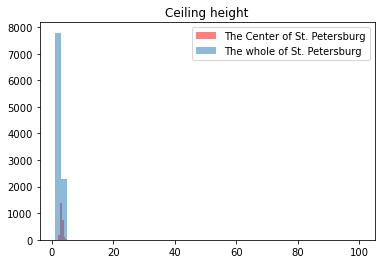

In [117]:
# Plotting histograms for each parameter
for parameter in parameters_spb_general_check:   
    
    plt.hist(
        spb_center[parameter[0]],
        bins = 50,
        alpha=0.5,
        label=('The Center of St. Petersburg'),
        color=['red'],
    )
    
    plt.hist(
        spb_all[parameter[0]],
        bins = 50,
        alpha=0.5,
        label=('The whole of St. Petersburg')
    )
    
    plt.legend(loc='upper right')
    plt.title(parameter[1])
    plt.show()

In [118]:
# parameters for checking the impact on the cost of the apartment
parameters_spb_price_check = [['total_rooms', 'Number of rooms'],
                              ['floor', 'Floor'],
                              ['city_center_distance_km', 'City center distance'],
                              ['year_exposition', 'Ad year of exposition']
                             ]

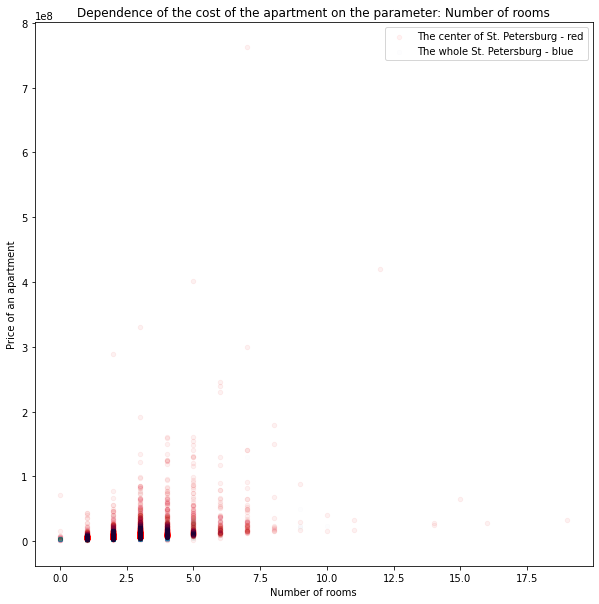

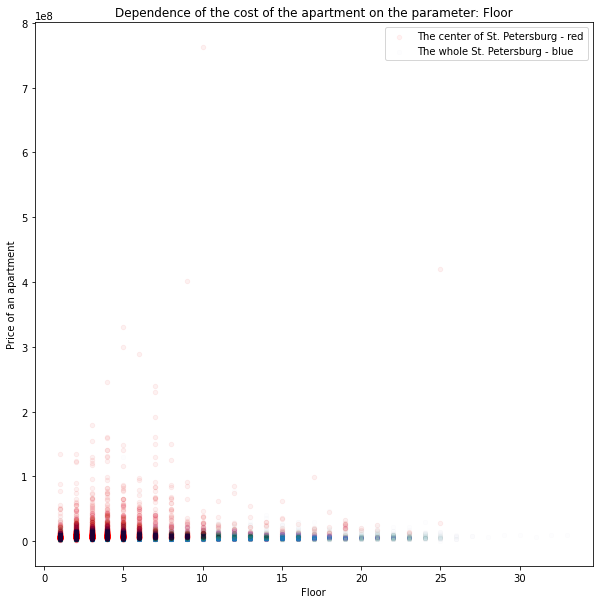

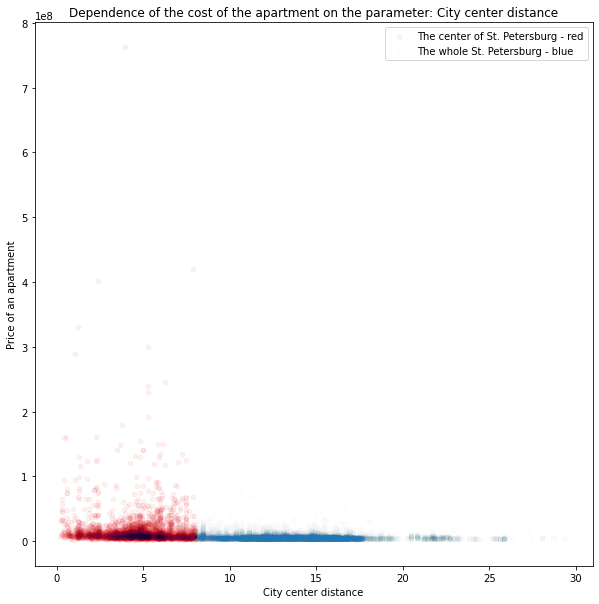

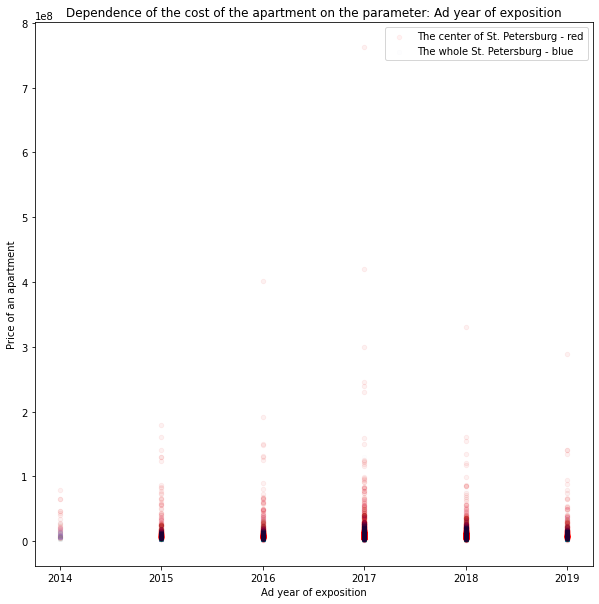

In [119]:
for parameter in parameters_spb_price_check:
    # The center of St. Petersburg
    fig, ax = plt.subplots(figsize=(10,10))
        
    
    spb_center.plot(
        x=parameter[0],
        alpha=0.05,
        y='last_price',
        kind='scatter',
        color=['red'],
        label=('The center of St. Petersburg - red'),
        ax = ax
    )

    
    spb_all.plot(
        x=parameter[0], 
        alpha=0.007, 
        y='last_price', 
        kind='scatter',
        label=('The whole St. Petersburg - blue'),
        ax = ax
    )
    
    plt.title('Dependence of the cost of the apartment on the parameter: {}'.format(parameter[1]))
    plt.xlabel(parameter[1])
    plt.ylabel('Price of an apartment')
    plt.show()
    

General analysis of parameters:

*Area:* 

In the center of St. Petersburg, they mainly have an area of 60-80 m2 with a pronounced surge at the level of 45 m2. For the whole city, this spike of 45 m2 remains, but the distribution is evenly reduced from 30 to 120 m2.

*Price:* 

The maximum price for the center of St. Petersburg is in the amount of 6 million rubles, while for the whole of St. Petersburg, the peak of real estate prices is 4 million rubles.


*Number of rooms:*

There are most two- and three-bedroom apartments in the center of St. Petersburg, and one-bedroom apartments are the leaders for the whole city.


*Ceiling height:*

The entire property has an average ceiling height of 2.6-2.7 m. However, it should be noted that in the center of St. Petersburg there are quite a lot of ceilings with a height of 3 m, although throughout the city as a whole there are mainly apartments with a height of 2.5 m.


*The influence of parameters on the value of real estate:*

1) Number of rooms: the center of St. Petersburg is characterized by a small spread of prices depending on the number of rooms, in comparison with the whole city.

2) Floor: there is less high-rise construction in the center of St. Petersburg than in the whole city — there are fewer ads, but with the growth of the floor, the cost spread in the center of St. Petersburg does not decrease as much as in the whole city.

3) Distance from the center: the trend is the same for the center and the whole of St. Petersburg — the farther the apartment is from the center, the cheaper it is.

4) Ad placement date: a slight decrease in the cost of apartments is typical for the center and the whole of St. Petersburg, starting from 2017.

In [120]:
# the general correlation of the cost of the apartment from the parameters for the center of St. Petersburg
(spb_center[['last_price',
     'total_area_m2',
     'total_rooms',
     'floor',
     'ceiling_height_m',
     'city_center_distance_km',
     'year_exposition']].copy()).corr().style.format("{:.1%}")

,last_price,total_area_m2,total_rooms,floor,ceiling_height_m,city_center_distance_km,year_exposition
last_price,100.0%,63.6%,33.3%,12.6%,10.2%,-4.8%,-4.3%
total_area_m2,63.6%,100.0%,73.7%,10.4%,14.7%,-10.5%,-7.6%
total_rooms,33.3%,73.7%,100.0%,-3.9%,10.4%,-17.6%,-6.1%
floor,12.6%,10.4%,-3.9%,100.0%,-7.9%,24.9%,-3.2%
ceiling_height_m,10.2%,14.7%,10.4%,-7.9%,100.0%,-15.3%,-1.9%
city_center_distance_km,-4.8%,-10.5%,-17.6%,24.9%,-15.3%,100.0%,3.2%
year_exposition,-4.3%,-7.6%,-6.1%,-3.2%,-1.9%,3.2%,100.0%


In [121]:
# the general correlation of the cost of the apartment from the parameters for the whole of St. Petersburg
(spb_all[['last_price',
     'total_area_m2',
     'total_rooms',
     'floor',
     'ceiling_height_m',
     'city_center_distance_km',
     'year_exposition']].copy()).corr().style.format("{:.1%}")

,last_price,total_area_m2,total_rooms,floor,ceiling_height_m,city_center_distance_km,year_exposition
last_price,100.0%,65.7%,37.2%,-0.1%,9.0%,-26.0%,-4.5%
total_area_m2,65.7%,100.0%,75.9%,-3.7%,10.2%,-33.8%,-8.6%
total_rooms,37.2%,75.9%,100.0%,-16.0%,6.3%,-29.4%,-6.1%
floor,-0.1%,-3.7%,-16.0%,100.0%,-2.2%,22.8%,1.2%
ceiling_height_m,9.0%,10.2%,6.3%,-2.2%,100.0%,-13.5%,-1.9%
city_center_distance_km,-26.0%,-33.8%,-29.4%,22.8%,-13.5%,100.0%,8.5%
year_exposition,-4.5%,-8.6%,-6.1%,1.2%,-1.9%,8.5%,100.0%


## Final conclusion

1) The cost of apartments is lower than that of all other types of real estate.

2) With the approach to the center of St. Petersburg, the cost of real estate usually usually increases, but the correlation coefficient is small, perhaps this is due to expensive real estate outside of St. Petersburg.

3) The results of calculations based on data with and without emissions give approximately the same indicators

4) For the sale of real estate in the center, first of all, important:

-Price per square meter

-All types of squares

-Number of rooms

-Proximity of parks and reservoirs

-Floor

Outside the center:

-Squares

-Number of rooms

-Price per square meter

-Balconies

-Floor